In [0]:
!pip install -q tf-nightly tfds-nightly

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Dense, Flatten, BatchNormalization, ELU, LeakyReLU, Reshape
import numpy as np
from IPython.display import clear_output
import os

tfds.disable_progress_bar()

print("Tensorflow Version: {}".format(tf.__version__))
print("GPU {} available.".format("is" if tf.config.experimental.list_physical_devices("GPU") else "not"))

Tensorflow Version: 2.2.0-dev20200218
GPU is available.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')  # for saving checkpoints

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# Data Preprocessing

In [0]:
def normalize(image):
  img = image['image']
  img = (tf.cast(img, tf.float32) - 127.5) / 127.5
  return img, 1.0  # 1.0 is the label for the real dataset

## MNIST Dataset

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead set
data_dir=gs://tfds-data/datasets.



Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.0. Subsequent calls will reuse this data.


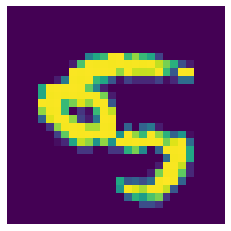

tf.Tensor(
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], shape=(256,), dtype=float32)


In [0]:
raw_datasets, metadata = tfds.load(name="mnist", with_info=True)
raw_train_datasets, raw_test_datasets = raw_datasets['train'], raw_datasets['test']

BUFFER_SIZE = 10000
BATCH_SIZE = 256

train_datasets = raw_train_datasets.map(normalize).cache().repeat().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
test_datasets = raw_test_datasets.map(normalize).batch(BATCH_SIZE)

for imgs, labels in train_datasets.take(1):
  img = imgs[0]
  plt.imshow(tf.keras.preprocessing.image.array_to_img(img))
  plt.axis("off")
  plt.show()
  print(labels)

## Fashion_MNIST Dataset

In [4]:
raw_datasets, metadata = tfds.load(name="fashion_mnist", with_info=True)

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.0.incomplete6ZZ1L0/fashion_mnist-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.0.incomplete6ZZ1L0/fashion_mnist-test.tfrecord
Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.0. Subsequent calls will reuse this data.


In [5]:
raw_train_datasets, raw_test_datasets = raw_datasets['train'], raw_datasets['test']
raw_train_datasets

<DatasetV1Adapter shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>

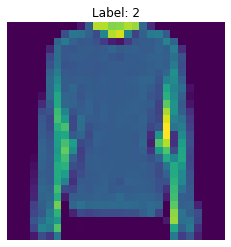

In [6]:
for image in raw_train_datasets.take(1):
  plt.imshow(tf.keras.preprocessing.image.array_to_img(image['image']))
  plt.axis("off")
  plt.title("Label: {}".format(image['label']))
  plt.show()

In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256

train_datasets = raw_train_datasets.map(normalize).repeat().cache().prefetch(BUFFER_SIZE).batch(BATCH_SIZE)
test_datasets = raw_test_datasets.map(normalize).batch(BATCH_SIZE)

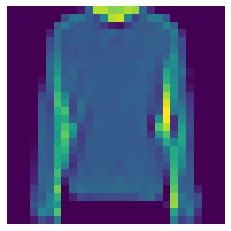

tf.Tensor(
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], shape=(256,), dtype=float32)


In [8]:
for imgs, labels in train_datasets.take(1):
  img = imgs[0]
  plt.imshow(tf.keras.preprocessing.image.array_to_img(img))
  plt.axis("off")
  plt.show()
  print(labels)

# Build the GAN Model

In [0]:
dis_path = os.path.join("/content/gdrive/My Drive/tmp", "dcgan", "dis")
dis_ckpt = os.path.join(dis_path, "dis_ckpt")

combined_path = os.path.join("/content/gdrive/My Drive/tmp", "dcgan", "combined")
combined_ckpt = os.path.join(combined_path, "combined_ckpt")

dir_path = os.path.dirname(dis_path)
if not os.path.exists(dir_path):
  print("Can't find the checkpoint path {}.".format(dir_path))

In [0]:
class DCGAN():
  def __init__(self):
    self.dis_losses = []
    self.gen_losses = []

    self.early_stopping_count_dis = 0
    self.early_stopping_count_gen = 0
    self.early_stopping_count = 10
    self.min_training_step = 5

    self.input_shape = (100, )
    self.fixed_noise = np.random.normal(0, 1, (16,) + self.input_shape)
    self.ckpt_path = "/cont"

    # build and compile the discriminator
    self.discriminator = self.build_discriminator()
    #self.discriminator = self.build_simple_discriminator()
    self.discriminator.compile(
        loss=tf.keras.losses.BinaryCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(0.001, 0.2)
    )
    
    # build and compile the generator
    self.generator = self.build_generator()
    #self.generator = self.build_simple_generator()

    # the generator takes noise as the input and generated images
    inputs = tf.keras.Input(shape=self.input_shape)
    generated_img = self.generator(inputs)

    # the combined model here we set it not to be trained
    self.discriminator.trainable = False

    # valid takes generated images as inputs
    valid = self.discriminator(generated_img)

    # the combined model
    # noise input => generating image => validity
    self.combined = tf.keras.Model(inputs, valid)
    self.combined.compile(
      loss=tf.keras.losses.BinaryCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(0.001, 0.2)
    )

  def Conv2D_block(self, filters, ksize, strides=(2, 2)):
    model = tf.keras.Sequential()
    model.add(Conv2D(
      filters=filters, kernel_size=ksize, strides=strides, padding="same"))
    model.add(ELU())
    return model

  def build_discriminator(self):
    inputs = tf.keras.Input(shape=(28, 28, 1))
    x = inputs

    down_stack = [
      self.Conv2D_block(filters=64, ksize=(3, 3), strides=(2, 2)),
      tf.keras.layers.Dropout(0.2),
      self.Conv2D_block(filters=128, ksize=(3, 3), strides=(1, 1)),
      tf.keras.layers.Dropout(0.2),
      self.Conv2D_block(filters=256, ksize=(5, 5), strides=(2, 2)),
      Flatten(),                        
      Dense(units=1, activation='sigmoid')
    ]

    for layer in down_stack:
      x = layer(x)
    outputs = x
    return tf.keras.Model(inputs, outputs)

  def build_simple_discriminator(self):
    """Build a simple discriminator model."""
    model = tf.keras.Sequential()
    model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding="same"))
    model.add(ELU())
    model.add(Conv2D(filters=64, kernel_size=(5, 5), strides=(2, 2), padding="same"))  #(14, 14, 64)
    model.add(ELU())
    model.add(Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), padding='same'))  # (14, 14, 128)
    model.add(ELU())  
    model.add(Conv2D(filters=128, kernel_size=(5, 5), strides=(2, 2), padding='same'))
    model.add(ELU())
    model.add(Flatten())
    model.add(Dense(units=1, activation='sigmoid'))

    inputs = tf.keras.Input(shape=(28, 28, 1))
    outputs = model(inputs)
    return tf.keras.Model(inputs, outputs)

  def DeConv2D_block(self, filters, ksize, strides=(2, 2)):
    model = tf.keras.Sequential()
    model.add(Conv2DTranspose(
      filters=filters, kernel_size=ksize, strides=strides, 
      padding="same", use_bias=False))
    model.add(BatchNormalization())
    model.add(ELU())
    return model

  def build_generator(self):
    inputs = tf.keras.Input(shape=self.input_shape)
    x = inputs

    x = tf.keras.layers.Dense(7*7*256, use_bias=False)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ELU()(x)
    x = tf.keras.layers.Reshape(target_shape=(7, 7, 256))(x)

    up_stack = [
      self.DeConv2D_block(filters=128, ksize=(3, 3)),
      self.DeConv2D_block(filters=64, ksize=(5, 5), strides=(1, 1))   
    ]    

    for layer in up_stack:
      x = layer(x)

    outputs = tf.keras.layers.Conv2DTranspose(
        filters=1, kernel_size=(5, 5), strides=(2, 2), padding="same",
        activation="tanh")(x)
    return tf.keras.Model(inputs, outputs)

  def build_simple_generator(self):
    """Build a simple generator."""
    model = tf.keras.Sequential()
    model.add(Dense(7*7*256, use_bias=False))
    model.add(BatchNormalization())
    model.add(ELU())

    model.add(Reshape(target_shape=(7,7,256)))   # (7, 7, 256)

    model.add(Conv2DTranspose(
                filters=125, kernel_size=(5, 5), strides=(1, 1),
                padding="same", use_bias=False)) # (7, 7, 125)
    model.add(BatchNormalization())
    model.add(ELU())

    model.add(Conv2DTranspose(
                filters=64, kernel_size=(5, 5), strides=(2, 2),
                padding="same", use_bias=False)) # (14, 14, 64)
    model.add(BatchNormalization())
    model.add(ELU())

    model.add(Conv2DTranspose(
                filters=1, kernel_size=(5, 5), strides=(2,2),
                padding="same", use_bias=False, activation="tanh")) # (28, 28, 1)
    
    inputs = tf.keras.Input(shape=self.input_shape)
    imgs = model(inputs)
    return tf.keras.Model(inputs, imgs)

  def train_step(self, datasets, epochs, batch_size, saved_interval=50):
    if tf.train.latest_checkpoint(dis_path) is not None:
      print("Load a pre-trained discriminator model.")
      self.discriminator.load_weights(dis_ckpt)
    
    if tf.train.latest_checkpoint(combined_path) is not None:
      print("Load a pre-trained combined model.")
      self.combined.load_weights(combined_ckpt)    

    for epoch in range(epochs):
      # ===================
      # train discriminator
      # ===================
      self.discriminator.trainable = True
      noise = np.random.randint(0, 255, size=(batch_size,) + self.input_shape)
      noise = (noise.astype(np.float32) - 127.5) / 127.5
      generated_images = self.generator(noise)
      generated_labels = np.zeros((batch_size, 1))

      # real images
      d_loss_real = self.discriminator.train_on_batch(datasets)

      # fake images
      d_loss_fake = self.discriminator.train_on_batch(generated_images, generated_labels)

      d_loss = d_loss_real + d_loss_fake

      # ===============
      # train generator
      # ===============
      self.discriminator.trainable = False
      noise = np.random.randint(0, 255, size=(batch_size,) + self.input_shape)
      noise = (noise.astype(np.float32) - 127.5) / 127.5

      # the generator wants the discriminator to label the generated samples as valid
      valid = np.ones((batch_size, 1))

      g_loss = self.combined.train_on_batch(noise, valid)

      # ========
      # progress
      # ========
      if epoch % saved_interval == 0:
        # save weights
        self.discriminator.save_weights(dis_ckpt)
        self.combined.save_weights(combined_ckpt)
        self.save_imgs(epoch)
        self.dis_losses.append(d_loss)
        self.gen_losses.append(g_loss)
        print("Epoch {}, Dis. loss: {}, Gen. loss: {}".format(epoch, d_loss, g_loss))
        self.plot_history()

        # early stopping
        if len(self.dis_losses) >= self.min_training_step and d_loss > min(self.dis_losses):
          self.early_stopping_count_dis += 1
        if len(self.gen_losses) >= self.min_training_step and g_loss > min(self.gen_losses):
          self.early_stopping_count_gen += 1

        if self.early_stopping_count_dis > self.early_stopping_count or \
          self.early_stopping_count_gen > self.early_stopping_count:
          print("Early stopping. Gen. {} Dis. {}".format(
            self.early_stopping_count_gen, self.early_stopping_count_dis))
          break

  def save_imgs(self, epoch):
    #noise = np.random.normal(0, 1, (1,) + self.input_shape)
    gen = self.generator(self.fixed_noise)
    gen = gen * 255.0
    clear_output(wait=True)
    plt.figure(figsize=(10, 10))
    for i in range(self.fixed_noise.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(tf.keras.preprocessing.image.array_to_img(gen[i]))
      plt.title("Epoch: {}".format(epoch))
      plt.axis("off")
    plt.show()

  def plot_history(self):
    plt.figure(figsize=(6, 4))

    plt.subplot(1,1,1)
    plt.plot(self.dis_losses, "r", label="Discriminator")
    plt.plot(self.gen_losses, "b", label="Genertor")
    plt.title("Loss")
    plt.legend(loc="upper right")

    plt.show()

  def get_discriminator():
    return self.discriminator

  def get_generator():
    return self.generator()

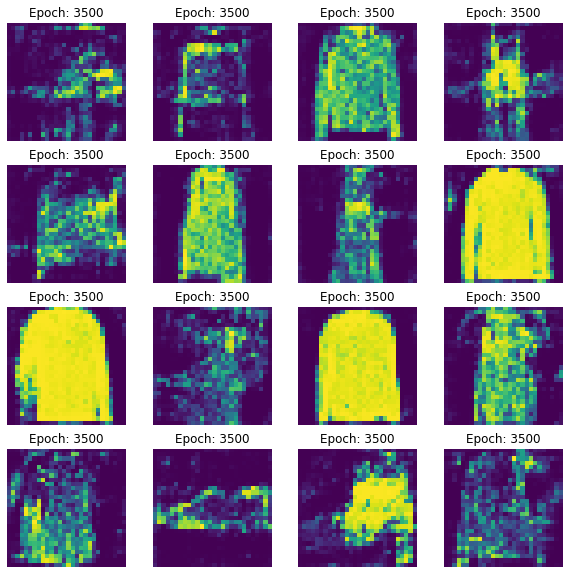

Epoch 3500, Dis. loss: 0.7710802555084229, Gen. loss: 4.549851417541504


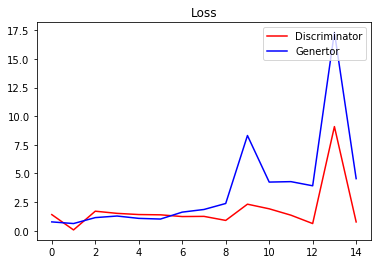

Early stopping. Gen. 11 Dis. 11


In [22]:
gan = DCGAN()
gan.train_step(train_datasets, epochs=5001, batch_size=BATCH_SIZE, saved_interval=250)